In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [3]:
finalFF = np.round(np.array([220, 252, 285, 317, 349, 382, 414, 447])*0.001, 3)
period = np.linspace(900, 886, 8)
print(period)

data_path = []
data_path.append('data\\220.txt')
data_path.append('data\\252.txt')
data_path.append('data\\252.txt')
data_path.append('data\\285.txt')
data_path.append('data\\317.txt')
data_path.append('data\\382.txt')
data_path.append('data\\349.txt')
data_path.append('data\\424.txt')
data_path.append('data\\447.txt')

data_label = []
for i in range(8):
    data_label.append('$FF_{{final}}$ = {}'.format(finalFF[i]))



data_label_period = []
for i in range(8):
    data_label_period.append('$\\Lambda$ = {}'.format(int(period[i])))

print(finalFF)
print(period)
    
data_label_both = []
for i in range(8):
    data_label_both.append('$\\Lambda$ = {} ,  $FF_{{final}}$ = {}'.format(int(period[i]), finalFF[i]))

[900. 898. 896. 894. 892. 890. 888. 886.]
[0.22  0.252 0.285 0.317 0.349 0.382 0.414 0.447]
[900. 898. 896. 894. 892. 890. 888. 886.]


In [4]:
data_E = pd.DataFrame({})
data_x = pd.DataFrame({})
for i in range(8):
    data_current = pd.read_csv(data_path[i], sep=",", header=None)
    data_current = data_current.drop([0])  # Drop the first row which contains the old header
    data_current.columns = ['x(m)', 'Y']
    data_current['x(m)'] = pd.to_numeric(data_current['x(m)'])
    data_current['Y'] = pd.to_numeric(data_current['Y'])
    data_x[i] = data_current['x(m)']
    data_E[i] = data_current['Y']



# for i in data['x(m)'].length()
# print(data['x(m)'].isna().sum())

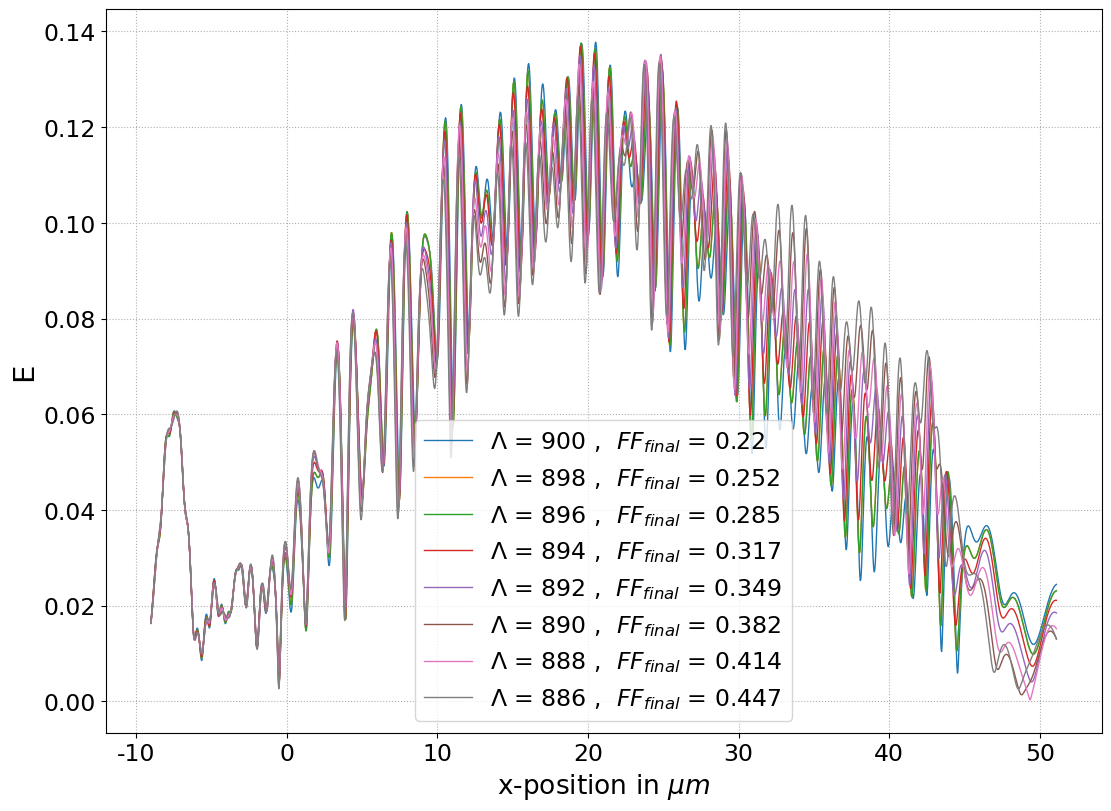

In [5]:
# Plot the data

tickslabelsize = 17
labelsize = 19
fontsize = 21

fig, ax = plt.subplots(figsize=(11, 8), layout='constrained')
for i in range(8):
    ax.plot(data_x[i], data_E[i], marker='', linewidth = 1 ,linestyle='-', label = data_label_both[i])

# Use scientific notation for x-axis tick labels if appropriate
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_xticks([x * 1e-5 for x in [-1, 0, 1, 2, 3, 4, 5]])
ax.set_xticklabels([-10, 0, 10, 20, 30, 40, 50])

# Increase label font size for readability and add a title
ax.set_xlabel('x-position in $\\mu m$', fontsize=labelsize)
ax.set_ylabel('E', fontsize=fontsize)
# ax.set_title('E-field vs. x-position', fontsize=14)

# Rotate x-axis tick labels to prevent overlap
ax.tick_params(axis='both', labelrotation=0, labelsize=tickslabelsize)

# Show grid
ax.grid(True, linestyle = ':')
ax.legend(fontsize = tickslabelsize)
plt.show()
fig.savefig('Up_E_overlay.png', dpi=300)